In [48]:
# DNN to predict Cardiovascular disease
import csv
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as sk_model
import sklearn.preprocessing as sk_preprocessing
import sklearn.metrics as sk_metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)
# dataset input and output
url = "https://raw.githubusercontent.com/EngineerRcMak/Stroke-Prediction-Imbalanced-Dataset/main/Stroke%20Prediction.csv"
dataset = pd.read_csv(url, delimiter = ',')
dataset_len = dataset.shape[0]
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [49]:
del dataset["id"]
del dataset["gender"]
del dataset["work_type"]
del dataset["smoking_status"]
dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,3.0,0,0,No,Rural,95.12,18.0,0
1,58.0,1,0,Yes,Urban,87.96,39.2,0
2,8.0,0,0,No,Urban,110.89,17.6,0
3,70.0,0,0,Yes,Rural,69.04,35.9,0
4,14.0,0,0,No,Rural,161.28,19.1,0
...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,Urban,58.64,20.4,0
43396,56.0,0,0,Yes,Urban,213.61,55.4,0
43397,82.0,1,0,Yes,Urban,91.94,28.9,0
43398,40.0,0,0,Yes,Urban,99.16,33.2,0


In [50]:
# dataset manipulation\
dataset["ever_married"]= dataset["ever_married"].replace({"No":0,"Yes":1})
dataset["Residence_type"]= dataset["Residence_type"].replace({"Rural":0,"Urban":1})
dataset

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,3.0,0,0,0,0,95.12,18.0,0
1,58.0,1,0,1,1,87.96,39.2,0
2,8.0,0,0,0,1,110.89,17.6,0
3,70.0,0,0,1,0,69.04,35.9,0
4,14.0,0,0,0,0,161.28,19.1,0
...,...,...,...,...,...,...,...,...
43395,10.0,0,0,0,1,58.64,20.4,0
43396,56.0,0,0,1,1,213.61,55.4,0
43397,82.0,1,0,1,1,91.94,28.9,0
43398,40.0,0,0,1,1,99.16,33.2,0


In [51]:
dataset.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,0.643733,0.501290,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,0.478901,0.500004,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,1.000000,1.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,1.000000,1.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                43400 non-null  float64
 1   hypertension       43400 non-null  int64  
 2   heart_disease      43400 non-null  int64  
 3   ever_married       43400 non-null  int64  
 4   Residence_type     43400 non-null  int64  
 5   avg_glucose_level  43400 non-null  float64
 6   bmi                41938 non-null  float64
 7   stroke             43400 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.6 MB


In [53]:
# extraction of input and output from dataset for easy calculation
# "Outcome" = output column
# all other columns are input columns

dataset_columns = dataset.columns.values.tolist()
dataset_columns_number = len(dataset_columns)
input_columns  = dataset_columns[: dataset_columns_number - 1] 
output_columns = dataset_columns[  dataset_columns_number - 1 :]

input_columns,  output_columns

(['age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'Residence_type',
  'avg_glucose_level',
  'bmi'],
 ['stroke'])

In [54]:
# build input matrix
real_input  = dataset[input_columns].copy() 
real_input

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,3.0,0,0,0,0,95.12,18.0
1,58.0,1,0,1,1,87.96,39.2
2,8.0,0,0,0,1,110.89,17.6
3,70.0,0,0,1,0,69.04,35.9
4,14.0,0,0,0,0,161.28,19.1
...,...,...,...,...,...,...,...
43395,10.0,0,0,0,1,58.64,20.4
43396,56.0,0,0,1,1,213.61,55.4
43397,82.0,1,0,1,1,91.94,28.9
43398,40.0,0,0,1,1,99.16,33.2


In [55]:
# build output matrix
real_output = dataset[output_columns].copy() 
real_output

,stroke
0,0
1,0
2,0
3,0
4,0
...,...
43395,0
43396,0
43397,0
43398,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc4b1eeed0>,
      dtype=object)

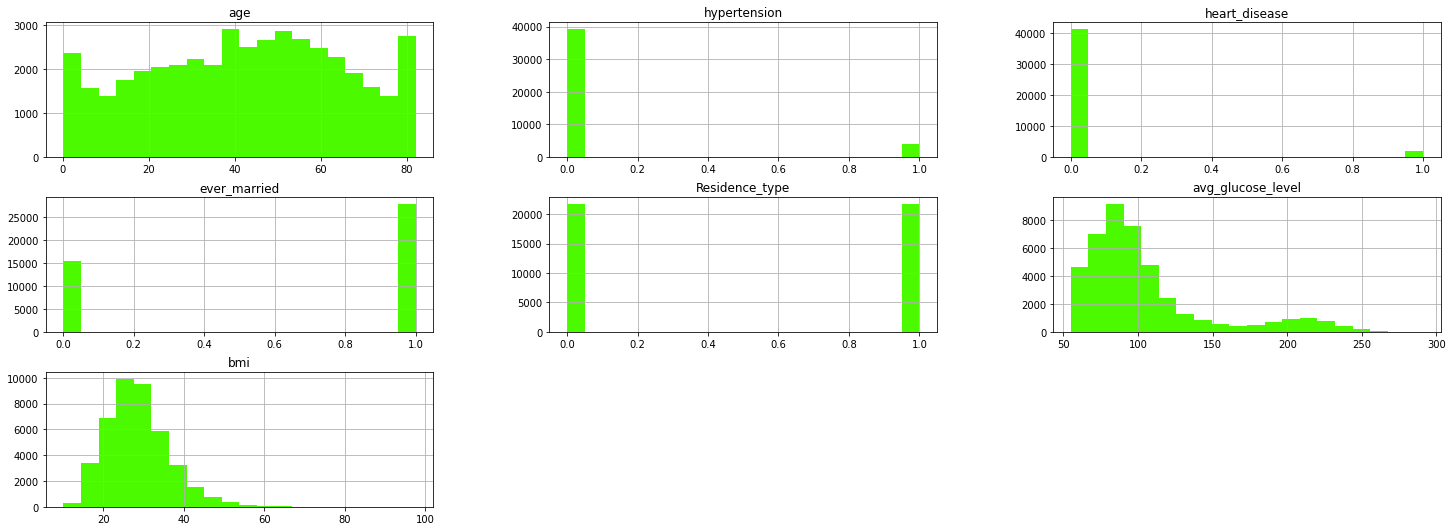

In [57]:
# outlier detection, data normalization for next several sessions
# histogram (data vs frequency)

real_input.hist(figsize = (25, 25), layout=(8,3), color='#4CFA00', bins = 20)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


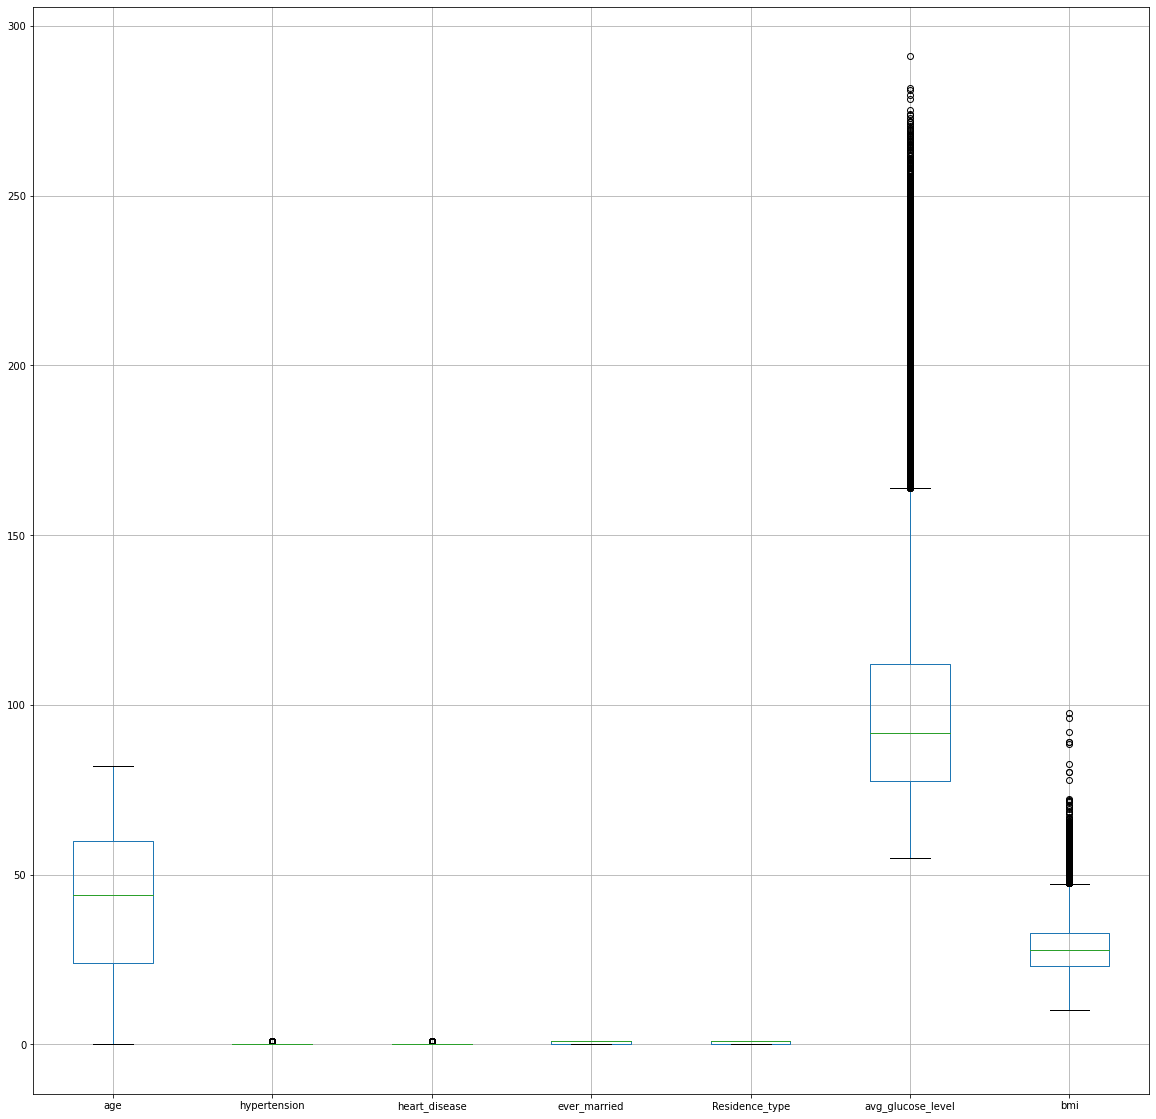

In [58]:
# boxplot.
# boxplot will tell us about outlier data and many more but to know about outlier data 
# boxplot is great.
# to know more about boxplot please visit the link below - 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
real_input.boxplot(figsize = (20, 20))

In [59]:
features = real_input.columns.values.tolist()
features

['age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi']

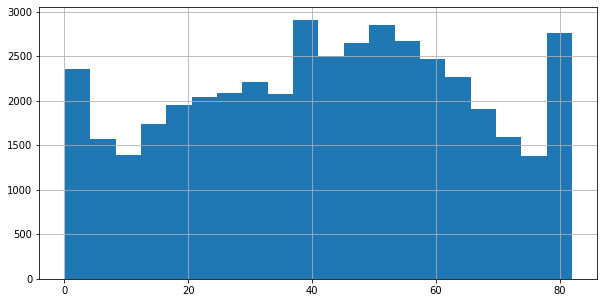

In [60]:
# outlier detection
j = 0
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

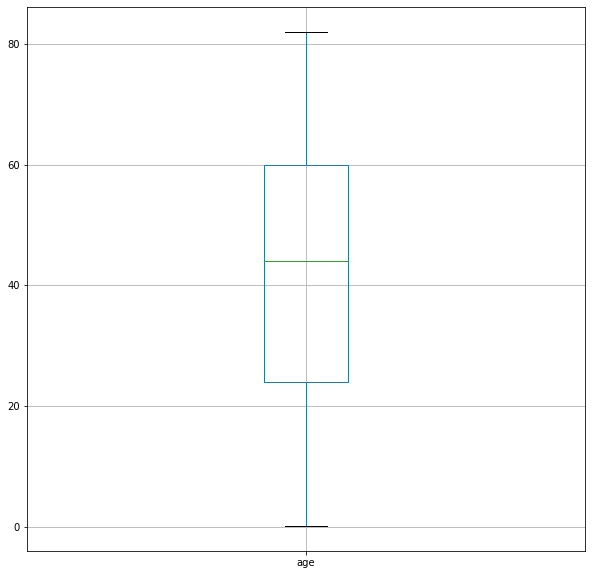

In [61]:
real_input.boxplot(column = feature, figsize = (10, 10))

In [63]:
'''
For feature "age",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 18) &\
                                                         (real_input[feature] <= 75) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 20) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 65)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 18) &\
                                                      (real_input[feature] <= 75) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 18) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 75].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 18)|(real_input[feature] > 75))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 18)|(real_input[feature] > 75))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [64]:
print("feature", feature, "details =")
real_input[feature].describe()

feature age details =


count    43400.000000
mean        43.240062
std         14.445929
min         18.000000
25%         34.450876
50%         38.000000
75%         55.000000
max         75.000000
Name: age, dtype: float64

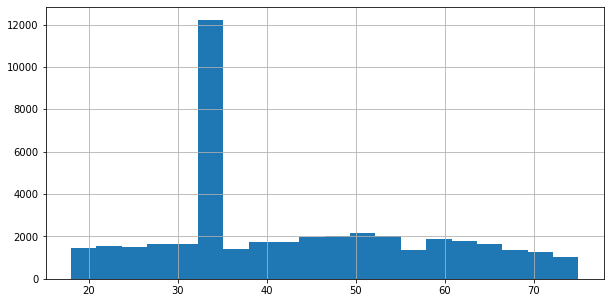

In [65]:
'''
Feature "age" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

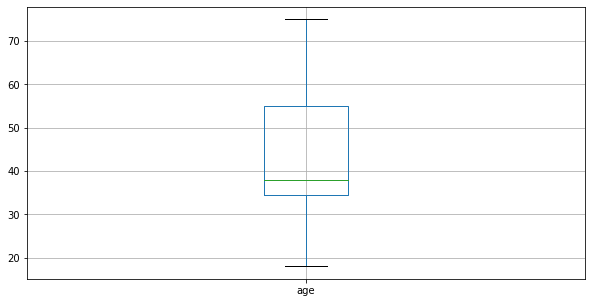

In [66]:
real_input.boxplot(column = feature, figsize = (10, 5))

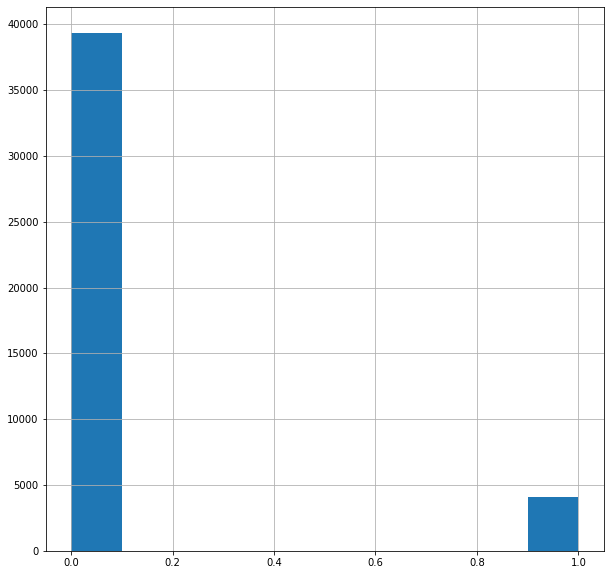

In [67]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 10), bins = 10)

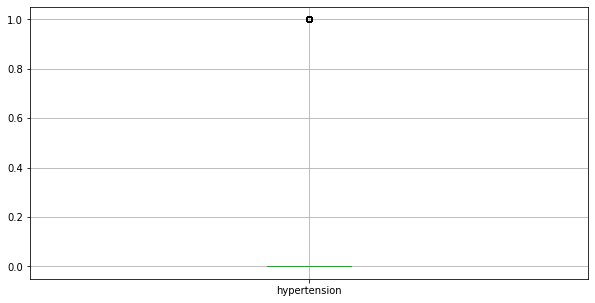

In [68]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [69]:
'''
For feature "hypertension",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.0) &\
                                                         (real_input[feature] <= 0.2) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.0) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 0.1)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.0) &\
                                                      (real_input[feature] <= 0.2) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.0) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 0.2].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.0)|(real_input[feature] > 0.2))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.0)|(real_input[feature] > 0.2))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [70]:
print("feature", feature, "details =")
real_input[feature].describe()

feature hypertension details =


count    43400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: hypertension, dtype: float64

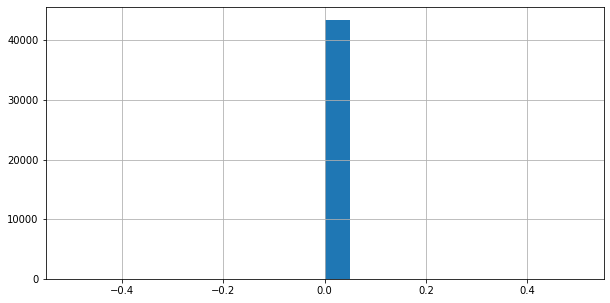

In [71]:
'''
feature "hypertension" is not well distributed. 
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

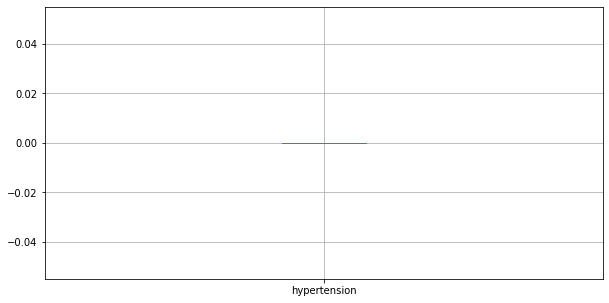

In [72]:
real_input.boxplot(column = feature, figsize = (10, 5))

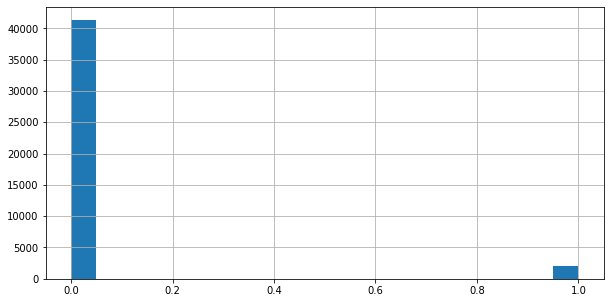

In [73]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

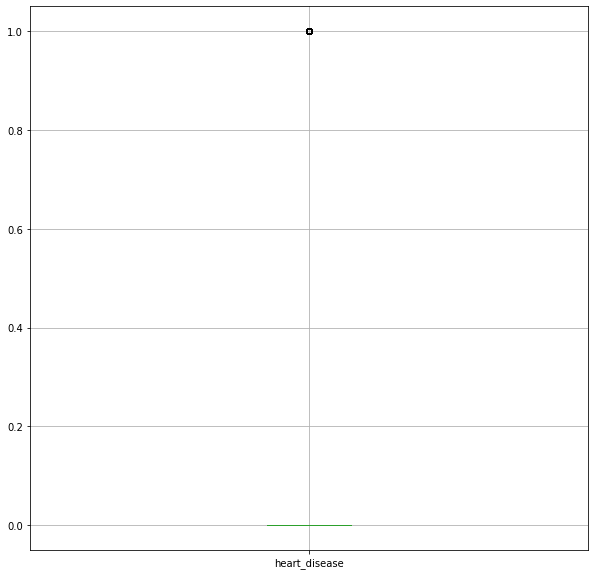

In [74]:
real_input.boxplot(column = feature, figsize = (10, 10))

In [75]:
'''
For feature "heart_disease",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.0) &\
                                                         (real_input[feature] <= 0.2) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.0) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 0.1)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.0) &\
                                                      (real_input[feature] <= 0.2) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.0) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 0.2].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.0)|(real_input[feature] > 0.2))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.0)|(real_input[feature] > 0.2))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [76]:
print("feature", feature, "details =")
real_input[feature].describe()

feature heart_disease details =


count    43400.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: heart_disease, dtype: float64

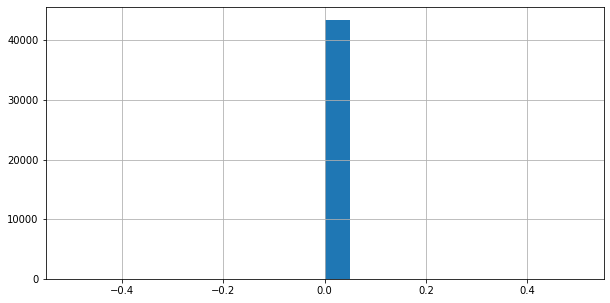

In [77]:
real_input[feature].hist(figsize = (10, 5), bins = 20)

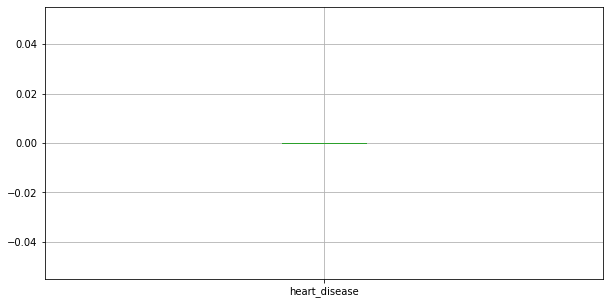

In [78]:
real_input.boxplot(column = feature, figsize = (10, 5))

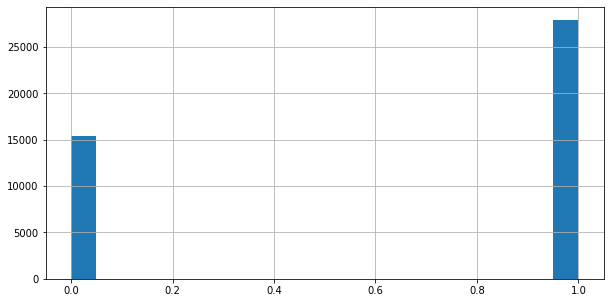

In [79]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

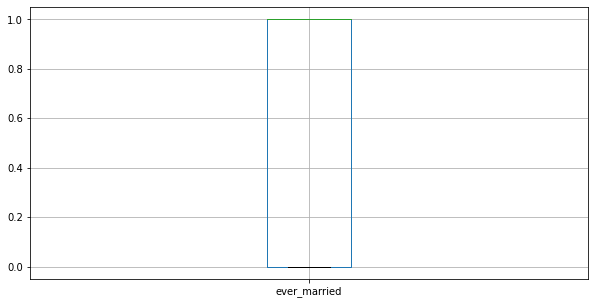

In [80]:
real_input.boxplot(column = feature, figsize = (10, 5))

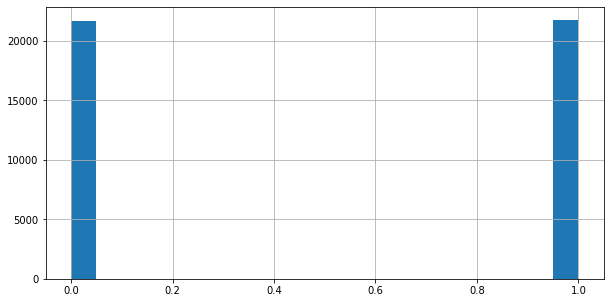

In [81]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

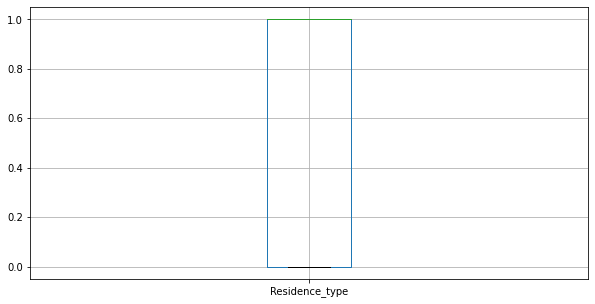

In [82]:
real_input.boxplot(column = feature, figsize = (10, 5))

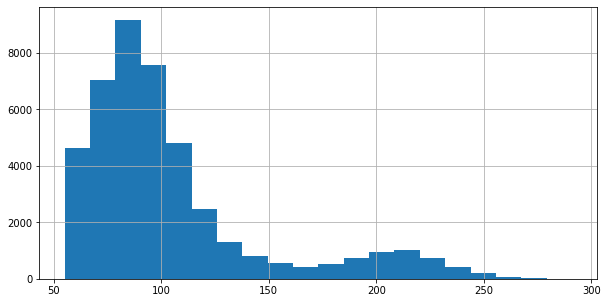

In [83]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

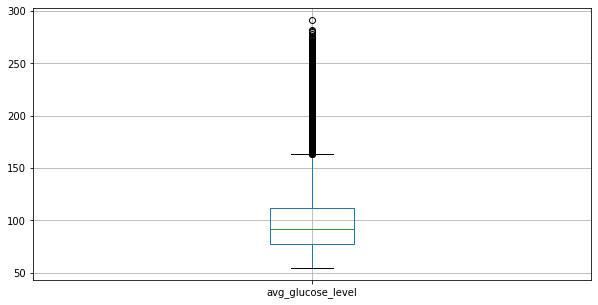

In [84]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [85]:
'''
For feature "avg_glucose_level",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.08, other = 60)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.15, other = 150)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 60) &\
                                                         (real_input[feature] <= 130) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 60) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 150)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 60) &\
                                                      (real_input[feature] <= 150) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 60) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 150].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 60)|(real_input[feature] > 150))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 60)|(real_input[feature] > 150))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [86]:
print("feature", feature, "details =")
real_input[feature].describe()

feature avg_glucose_level details =


count    43400.0
mean       150.0
std          0.0
min        150.0
25%        150.0
50%        150.0
75%        150.0
max        150.0
Name: avg_glucose_level, dtype: float64

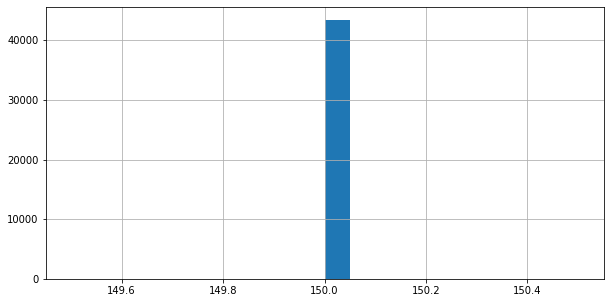

In [87]:
'''
Feature "avg_glucose_level" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

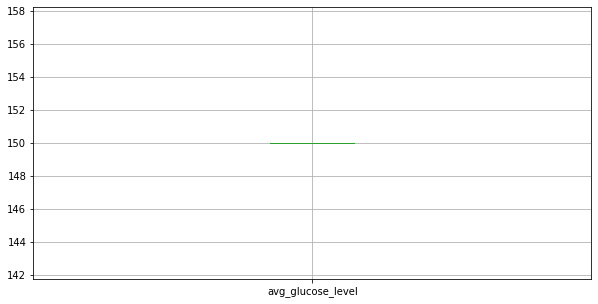

In [88]:
real_input.boxplot(column = feature, figsize = (10, 5))

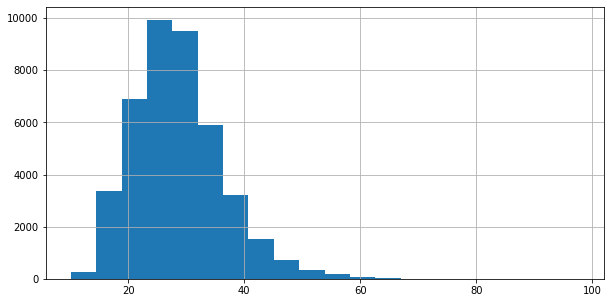

In [89]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

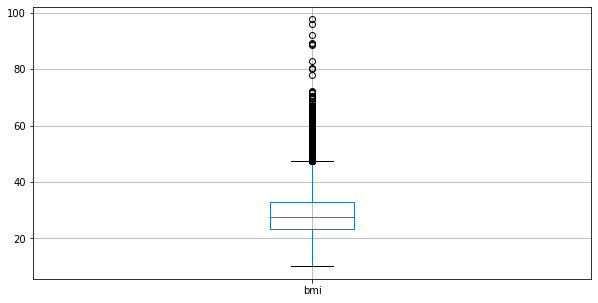

In [90]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [91]:
'''
For feature "bmi",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 10, other = 20)
real_input[feature] = real_input[feature].mask(real_input[feature] > 42, other = 40)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 20) &\
                                                         (real_input[feature] <= 40) &\
                                                         (real_output["stroke"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 20) &\
                                           (real_output["stroke"] == 0) &\
                                           (real_input[feature] > 42)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["stroke"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 20) &\
                                                      (real_input[feature] <= 40) &\
                                                      (real_output["stroke"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 20) &\
                                        (real_output["stroke"] == 1) &\
                                        (real_input[feature]) > 40].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["stroke"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 20)|(real_input[feature] > 40))&\
                                               (real_output["stroke"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 20)|(real_input[feature] > 40))&\
                                               (real_output["stroke"] == 1),\
                                               other = mean_value_cardiovascular)

In [92]:
print("feature", feature, "details =")
real_input[feature].describe()

feature bmi details =


count    41938.000000
mean        28.616083
std          5.455841
min         20.000000
25%         24.382441
50%         27.400000
75%         32.300000
max         40.000000
Name: bmi, dtype: float64

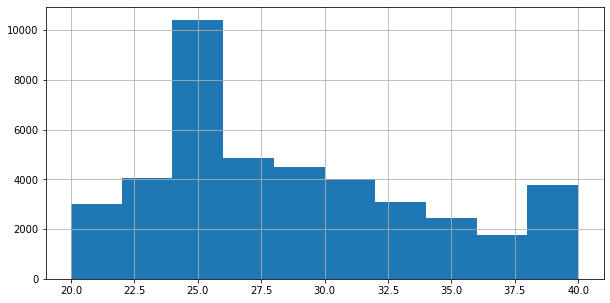

In [93]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

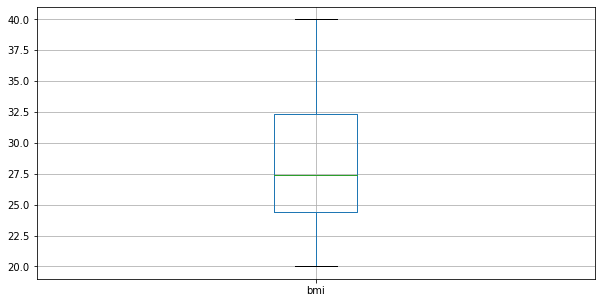

In [94]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [95]:
#data normalization
'''    
There are a number of techniques to normalize data such as-
min-max normalization, feature clipping, log scaling, z-score etc.
more information available at -
https://developers.google.com/machine-learning/data-prep/transform/normalization
'''
# min-max equation -
# X = (X - Xmin) / (Xmax - Xmin)
#real_input = (real_input - real_input.min()) / (real_input.max() - real_input.min())
tmp_input  = sk_preprocessing.MinMaxScaler().fit_transform(real_input)
real_input = pd.DataFrame(data = tmp_input, columns = real_input.columns.values.tolist())

real_input

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.288612,0.0,0.0,0.0,0.0,0.0,0.219122
1,0.701754,0.0,0.0,1.0,1.0,0.0,0.960000
2,0.288612,0.0,0.0,0.0,1.0,0.0,0.219122
3,0.912281,0.0,0.0,1.0,0.0,0.0,0.795000
4,0.288612,0.0,0.0,0.0,0.0,0.0,0.219122
...,...,...,...,...,...,...,...
43395,0.288612,0.0,0.0,0.0,1.0,0.0,0.020000
43396,0.666667,0.0,0.0,1.0,1.0,0.0,1.000000
43397,0.288612,0.0,0.0,1.0,1.0,0.0,0.445000
43398,0.385965,0.0,0.0,1.0,1.0,0.0,0.660000


In [96]:
real_input.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
count,43400.000000,43400.0,43400.0,43400.000000,43400.000000,43400.0,41938.000000
mean,0.442808,0.0,0.0,0.643733,0.501290,0.0,0.430804
std,0.253437,0.0,0.0,0.478901,0.500004,0.0,0.272792
min,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
25%,0.288612,0.0,0.0,0.000000,0.000000,0.0,0.219122
50%,0.350877,0.0,0.0,1.000000,1.000000,0.0,0.370000
75%,0.649123,0.0,0.0,1.000000,1.000000,0.0,0.615000
max,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000


In [97]:
# data correlation 
real_input.corr()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
age,1.000000,NaN,NaN,0.531281,-0.000990,NaN,0.223001
hypertension,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ever_married,0.531281,NaN,NaN,1.000000,0.004422,NaN,0.277351
Residence_type,-0.000990,NaN,NaN,0.004422,1.000000,NaN,-0.001212
avg_glucose_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.223001,NaN,NaN,0.277351,-0.001212,NaN,1.000000


([<matplotlib.axis.YTick at 0x7efc48ff0790>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'hypertension'),
  Text(0, 0, 'heart_disease'),
  Text(0, 0, 'ever_married'),
  Text(0, 0, 'Residence_type'),
  Text(0, 0, 'avg_glucose_level'),
  Text(0, 0, 'bmi')])

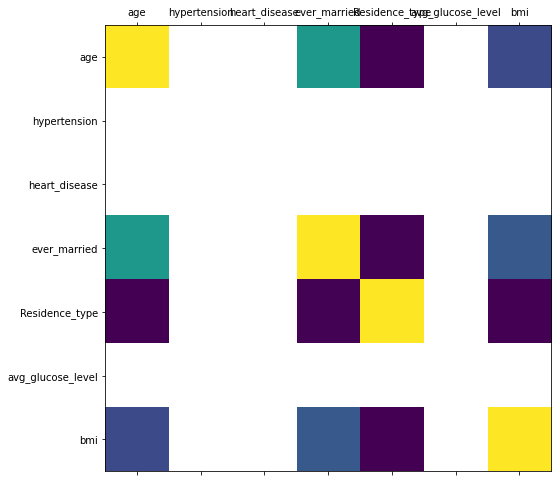

In [98]:
# graphical representation of data correlation
# data correlation means dependency of data among each others i.e.
# dependency of attributes among each other
'''
data correlation formula between two attributes (data columns) X and Y -

            Σ(X - Xmean) * Σ(Y - Ymean) 
corr = -------------------------------------
       sqrt(Σ(X - Xmean)^2 * Σ(Y - Ymean)^2)
       
'''
plt.matshow(real_input.corr())
plt.xticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)
plt.yticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)

In [99]:
# split real_input and real_output into train and test input, output taking
# 70:30 train:test 
train_input, test_input, train_output, test_output = sk_model.train_test_split(real_input,\
                                                                                real_output,\
                                                                                train_size = 0.60)
train_input.shape, test_input.shape, train_output.shape, test_output.shape

((26040, 7), (17360, 7), (26040, 1), (17360, 1))

In [100]:
'''
Tensor-Flow Keras Neural Network model life-cycle.
1. Define the model,
2. Compile the model,
3. Fit the model,
4. Evaluate the model,
5. Predict the model.
'''

'\nTensor-Flow Keras Neural Network model life-cycle.\n1. Define the model,\n2. Compile the model,\n3. Fit the model,\n4. Evaluate the model,\n5. Predict the model.\n'

In [101]:
# Define model1
h1, h2 = 8, 12
o = 1
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(h1, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model1.add(tf.keras.layers.Dense(h2, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform'))
model1.add(tf.keras.layers.Dense(o, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform'))

In [102]:
# Define model2
h1, h2 = 8, 12
o = 1
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(h1, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model2.add(tf.keras.layers.Dense(h2, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))
model2.add(tf.keras.layers.Dense(o, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))

In [103]:
# Define model3
h1, h2 = 8, 12
o = 1
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(h1, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model3.add(tf.keras.layers.Dense(h2, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform'))
model3.add(tf.keras.layers.Dense(o, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform'))

In [104]:
# Define model4
h1, h2 = 8, 12
o = 1
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(h1, activation = 'relu',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model4.add(tf.keras.layers.Dense(h2, activation = 'relu',\
                                kernel_initializer = 'glorot_uniform'))
model4.add(tf.keras.layers.Dense(o, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))

In [105]:
# Define model5
h1, h2 = 8, 12
o = 1
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(h1, activation = 'swish',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model5.add(tf.keras.layers.Dense(h2, activation = 'swish',\
                                kernel_initializer = 'glorot_uniform'))
model5.add(tf.keras.layers.Dense(o, activation = 'swish',\
                                kernel_initializer = 'glorot_uniform'))

In [106]:
# Compile model1
opt1 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model1.compile(optimizer=opt1, loss='mse', metrics=['binary_accuracy'])

In [107]:
# Compile model2
opt2 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model2.compile(optimizer=opt2, loss='mse', metrics=['binary_accuracy'])

In [108]:
# Compile model3
opt3 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model3.compile(optimizer=opt3, loss='mse', metrics=['binary_accuracy'])

In [109]:
# Compile model4
opt4 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model4.compile(optimizer=opt4, loss='mse', metrics=['binary_accuracy'])

In [110]:
# Compile model5
opt5 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model5.compile(optimizer=opt5, loss='mse', metrics=['binary_accuracy'])

In [111]:
# Fit the model1
st1 = time.time()
train_history1 = model1.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en1 = time.time()
en1 - st1

89.00953197479248

In [112]:
# Fit the model2
st2 = time.time()
train_history2 = model2.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en2 = time.time()
en2 - st2

82.24663281440735

In [113]:
# Fit the model3
st3 = time.time()
train_history3 = model3.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en3 = time.time()
en3 - st3

112.72743606567383

In [114]:
# Fit the model4
st4 = time.time()
train_history4 = model4.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en4 = time.time()
en4 - st4

70.53829216957092

In [115]:
# Fit the model5
st5 = time.time()
train_history5 = model5.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en5 = time.time()
en5 - st5

86.9641661643982

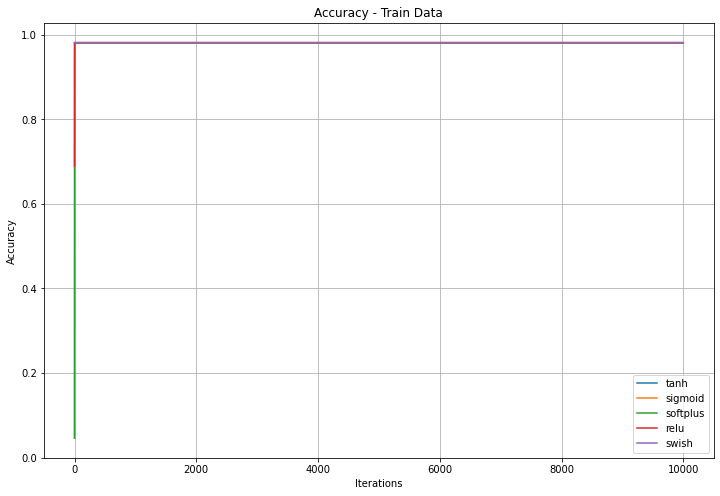

In [116]:
# graph plot - Train Data (accuracy) 
plt.plot(train_history1.history['binary_accuracy'], label = 'tanh')
plt.plot(train_history2.history['binary_accuracy'], label = 'sigmoid')
plt.plot(train_history3.history['binary_accuracy'], label = 'softplus')
plt.plot(train_history4.history['binary_accuracy'], label = 'relu')
plt.plot(train_history5.history['binary_accuracy'], label = 'swish')
plt.grid(True)
plt.title("Accuracy - Train Data")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

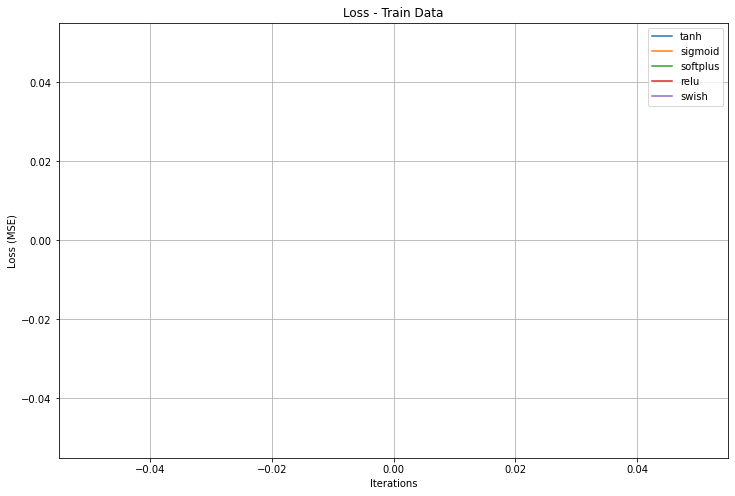

In [117]:
# graph plot - Train Data (loss) 
plt.plot(train_history1.history['loss'], label = 'tanh')
plt.plot(train_history2.history['loss'], label = 'sigmoid')
plt.plot(train_history3.history['loss'], label = 'softplus')
plt.plot(train_history4.history['loss'], label = 'relu')
plt.plot(train_history5.history['loss'], label = 'swish')
plt.grid(True)
plt.title("Loss - Train Data")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [120]:
# evaluate the model1 - tanh
cost1, test_accuracy1 = model1.evaluate(test_input, test_output, verbose=0)
cost1, test_accuracy1

(nan, 0.983410120010376)

In [119]:
# evaluate the model2 - sigmoid
cost2, test_accuracy2 = model2.evaluate(test_input, test_output, verbose=0)
cost2, test_accuracy2

(nan, 0.983410120010376)

In [ ]:
# evaluate the model3 - softplus
cost3, test_accuracy3 = model3.evaluate(test_input, test_output, verbose=0)
cost3, test_accuracy3

(nan, 0.98162442445755)

In [ ]:
# evaluate the model4 - relu
cost4, test_accuracy4 = model4.evaluate(test_input, test_output, verbose=0)
cost4, test_accuracy4

(nan, 0.98162442445755)

In [ ]:
# evaluate the model5 - swish
cost5, test_accuracy5 = model5.evaluate(test_input, test_output, verbose=0)
cost5, test_accuracy5

(nan, 0.98162442445755)

In [ ]:
# predict the model1 - tanh
predict_output1 = model1.predict(test_input)
predict_output1 = np.where(predict_output1 < 0.5, 0, 1).flatten()

In [ ]:
# predict the model2 - sigmoid
predict_output2 = model2.predict(test_input)
predict_output2 = np.where(predict_output2 < 0.5, 0, 1).flatten()

In [ ]:
# predict the model3 - softplus
predict_output3 = model3.predict(test_input)
predict_output3 = np.where(predict_output3 < 0.5, 0, 1).flatten()

In [ ]:
# predict the model4 - relu
predict_output4 = model4.predict(test_input)
predict_output4 = np.where(predict_output4 < 0.5, 0, 1).flatten()

In [ ]:
# predict the model5 - swish
predict_output5 = model5.predict(test_input)
predict_output5 = np.where(predict_output5 < 0.5, 0, 1).flatten()

In [ ]:
# confusion matrix1 - tanh
confusion_matrix1 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output1)
confusion_matrix1

array([[    0, 17041],
       [    0,   319]])

In [ ]:
# confusion matrix2 - sigmoid
confusion_matrix2 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output2)
confusion_matrix2

array([[    0, 17041],
       [    0,   319]])

In [ ]:
# confusion matrix3 - softplus
confusion_matrix3 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output3)
confusion_matrix3

array([[    0, 17041],
       [    0,   319]])

In [ ]:
# confusion matrix4 - relu
confusion_matrix4 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output4)
confusion_matrix4

array([[    0, 17041],
       [    0,   319]])

In [ ]:
# confusion matrix5 - swish
confusion_matrix5 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output5)
confusion_matrix5

array([[    0, 17041],
       [    0,   319]])

In [ ]:
# classification report1 - classwise recall, precision - tanh
classification_report1 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output1)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17041
           1       0.02      1.00      0.04       319

    accuracy                           0.02     17360
   macro avg       0.01      0.50      0.02     17360
weighted avg       0.00      0.02      0.00     17360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# classification report2 - classwise recall, precision - sigmoid
classification_report2 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output2)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17041
           1       0.02      1.00      0.04       319

    accuracy                           0.02     17360
   macro avg       0.01      0.50      0.02     17360
weighted avg       0.00      0.02      0.00     17360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# classification report3 - classwise recall, precision - softplus
classification_report3 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output3)
print(classification_report3)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17041
           1       0.02      1.00      0.04       319

    accuracy                           0.02     17360
   macro avg       0.01      0.50      0.02     17360
weighted avg       0.00      0.02      0.00     17360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# classification report4 - classwise recall, precision - relu
classification_report4 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output4)
print(classification_report4)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17041
           1       0.02      1.00      0.04       319

    accuracy                           0.02     17360
   macro avg       0.01      0.50      0.02     17360
weighted avg       0.00      0.02      0.00     17360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# classification report5 - classwise recall, precision - swish
classification_report5 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output5)
print(classification_report5)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17041
           1       0.02      1.00      0.04       319

    accuracy                           0.02     17360
   macro avg       0.01      0.50      0.02     17360
weighted avg       0.00      0.02      0.00     17360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# ROC1 (Receiver Operating Characteristics) curve - tanh
ROC_curve1 = sk_metrics.roc_curve(np.array(test_output).flatten(), model1.predict(test_input).flatten())
plt.plot(ROC_curve1)
plt.grid(True)

ValueError: ignored

In [ ]:
# ROC2 (Receiver Operating Characteristics) curve - sigmoid
ROC_curve2 = sk_metrics.roc_curve(np.array(test_output).flatten(), model2.predict(test_input).flatten())
plt.plot(ROC_curve2)
plt.grid(True)

ValueError: ignored

In [ ]:
# ROC3 (Receiver Operating Characteristics) curve - softplus
ROC_curve3 = sk_metrics.roc_curve(np.array(test_output).flatten(), model3.predict(test_input).flatten())
plt.plot(ROC_curve3)
plt.grid(True)

ValueError: ignored

In [ ]:
# ROC4 (Receiver Operating Characteristics) curve - relu
ROC_curve4 = sk_metrics.roc_curve(np.array(test_output).flatten(), model4.predict(test_input).flatten())
plt.plot(ROC_curve4)
plt.grid(True)

ValueError: ignored

In [ ]:
# ROC5 (Receiver Operating Characteristics) curve - swish
ROC_curve5 = sk_metrics.roc_curve(np.array(test_output).flatten(), model5.predict(test_input).flatten())
plt.plot(ROC_curve5)
plt.grid(True)

ValueError: ignored